# This notebook performs binary classification on cardiovascular disease risk prediction dataset- Heart UCI (Using Scikit learn).

# 1. Heart UCI Dataset (Download dataset from link: https://www.kaggle.com/ronitf/heart-disease-uci/data)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.ensemble import ExtraTreesClassifier
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_validate
from sklearn.metrics import average_precision_score
from sklearn.metrics import roc_auc_score
import warnings
warnings.simplefilter("ignore")

C:\Users\meghana\Anaconda_new\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [18]:
#Identify the independent and the dependent features
dataset=pd.read_csv(r'C:\Users\meghana\Downloads\heart-disease-uci\heart.csv')   # Replace with correct file location
y=dataset['target']
X=dataset.iloc[:,:-1]

In [19]:
#Splitting the dataset into Training and test set
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33,random_state=25)

In [20]:
#Preprocesssing X_train data
#No missing data in the dataset,so imputing skipped
#Encoding categorical data
cat_columns = ['cp', 'slope', 'ca']
num_columns=['age','trestbps', 'chol', 'oldpeak','thalach']
dataset_processed = pd.get_dummies(X_train, prefix_sep="_",
                              columns=cat_columns,drop_first=True)        # Needs to be done depending on whether the features are cardinal or ordinal in nature.

In [21]:
#Scale all the numeric columns.
sc_X=StandardScaler()
dataset_processed[num_columns]=sc_X.fit_transform(dataset_processed[num_columns])
X_train=dataset_processed.as_matrix()
labelencoder_y=LabelEncoder()
y_train=labelencoder_y.fit_transform(y_train)

In [22]:
#Preprocessing X_test data
#No missing data in the dataset, so imputing skipped
#Encoding categorical data
cat_columns = ['cp', 'slope', 'ca']
num_columns=['age','trestbps', 'chol', 'oldpeak','thalach']
dataset_processed_test = pd.get_dummies(X_test, prefix_sep="_",
                              columns=cat_columns,drop_first=True)
#Scale all the columns.
sc_X=StandardScaler()
dataset_processed_test[num_columns]=sc_X.fit_transform(dataset_processed_test[num_columns])
X_test=dataset_processed_test.as_matrix()
labelencoder_y=LabelEncoder()
y_test=labelencoder_y.fit_transform(y_test)

In [25]:
#-----------------------------------Logistic Regression---------------------------------#
#1) Part 1: Plain logistic Regression
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(max_iter=600,C=1.2)   ## Technique for getting the best_max_iter and the best_C using hyperparameter curves will be discussed later

#Scoring metrics evaluation (Keep copying this).
scoring = {'acc': 'accuracy',
           'Area_under_PR': 'average_precision',
           'Area_under_ROC_AUC': 'roc_auc'}
accuracies=cross_validate(classifier, X_train,y_train,scoring=scoring, cv=5) #Accuracy is obtained through splitting the training set into k-folds, applying the model om each one of them.   

#Cross validation accuracy performance
print("Plain logistic regression")
print("Mean training accuracy on the k-folds : "+str(accuracies['train_acc'].mean()))
print("Cross validation Accuracy: "+str(accuracies['test_acc'].mean())+" +- "+ str(accuracies['test_acc'].std()))
print("Area under PR curve: "+str(accuracies['test_Area_under_PR'].mean()))
print("Area under ROC-AUC curve: "+str(accuracies['test_Area_under_ROC_AUC'].mean()))

#Now fit the training data as a whole.
classifier.fit(X_train,y_train)

#Test performance
print("Test set performance: "+ str(accuracy_score(y_test,classifier.predict(X_test))))

Plain logistic regression
Mean training accuracy on the k-folds : 0.8756343255320761
Cross validation Accuracy: 0.7985365853658537 +- 0.06122582806794522
Area under PR curve: 0.9026470836992321
Area under ROC-AUC curve: 0.8967190704032809
Test set performance: 0.88


Logistic Regression after f_classif: 
Mean training accuracy on the k-folds : 0.8325380595319245
Cross validation Accuracy: 0.8178048780487807 +- 0.024284526988208887
Area under PR curve: 0.8835039785254498
Area under ROC-AUC curve: 0.8801549327865118
Test set performance: 0.81


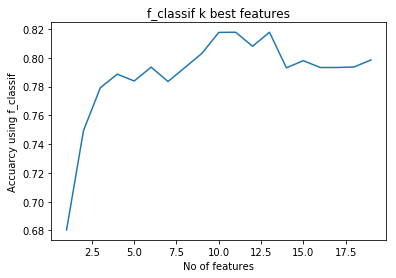

In [29]:
#2) Part 2: Logistic Regression done using features on which Feature selection is performed using f_classification
print("Logistic Regression after f_classif: ")
from sklearn.feature_selection import SelectKBest, f_classif
val_scores_mean=[]
classifier=LogisticRegression(C=1.2,max_iter=600)   ## Technique for getting the best_max_iter and the best_C using hyperparameter curves will be discussed later
for i in range(1,20):
    skb=SelectKBest(score_func=f_classif, k=i)
    fit=skb.fit(X_train,y_train)
    features=fit.transform(X_train)
    classifier.fit(features,y_train)
    accuracies=cross_val_score(estimator=classifier, X=features,y=y_train,cv=5) #Accuracy is obtained through splitting the training set into k-folds, applying the model om each one of them.   
    val_scores_mean.append(accuracies.mean())
    
plt.figure(11)
plt.plot(np.arange(1,20).tolist(),val_scores_mean)
plt.xlabel("No of features")
plt.ylabel("Accuarcy using f_classif")
plt.title("f_classif k best features")

k_best=val_scores_mean.index(max(val_scores_mean))+1
skb=SelectKBest(score_func=f_classif, k=k_best)
fit=skb.fit(X_train,y_train)
features=fit.transform(X_train)
classifier.fit(features,y_train)

#Scoring metrics evaluation (Keep copying this).
scoring = {'acc': 'accuracy',
           'Area_under_PR': 'average_precision',
           'Area_under_ROC_AUC': 'roc_auc'}
accuracies=cross_validate(classifier, features,y_train,scoring=scoring, cv=5) #Accuracy is obtained through splitting the training set into k-folds, applying the model om each one of them.   

#Cross validation accuracy performance
print("Mean training accuracy on the k-folds : "+str(accuracies['train_acc'].mean()))
print("Cross validation Accuracy: "+str(accuracies['test_acc'].mean())+" +- "+ str(accuracies['test_acc'].std()))
print("Area under PR curve: "+str(accuracies['test_Area_under_PR'].mean()))
print("Area under ROC-AUC curve: "+str(accuracies['test_Area_under_ROC_AUC'].mean()))

#Test performance
features=fit.transform(X_test)
print("Test set performance: "+ str(accuracy_score(y_test,classifier.predict(features))))

Logistic Regression after mutual_info_classif: 
Mean training accuracy on the k-folds : 0.8325456335681285
Cross validation Accuracy: 0.7931707317073171 +- 0.018984479712606226
Area under PR curve: 0.8710155733843742
Area under ROC-AUC curve: 0.8628389154704944
Test set performance: 0.8


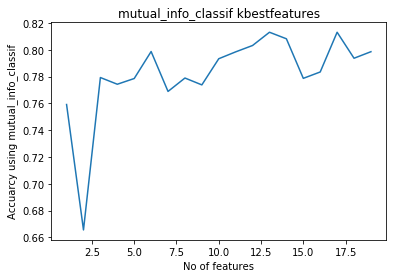

In [30]:
#3) Logistic Regression done using features on whivh Feature selection is performed using mutual_information
print("Logistic Regression after mutual_info_classif: ")
from sklearn.feature_selection import SelectKBest, mutual_info_classif
classifier=LogisticRegression(C=1.2,max_iter=600)    ## Technique for getting the best_max_iter and the best_C using hyperparameter curves will be discussed later
from sklearn.feature_selection import SelectKBest
val_scores_mean=[]
for i in range(1,20):
    skb=SelectKBest(score_func=mutual_info_classif, k=i)
    fit=skb.fit(X_train,y_train)
    features=fit.transform(X_train)
    classifier.fit(features,y_train)
    accuracies=cross_val_score(estimator=classifier, X=features,y=y_train,cv=5) #Accuracy is obtained through splitting the training set into k-folds, applying the model om each one of them.   
    val_scores_mean.append(accuracies.mean())
    
plt.figure(12)
plt.plot(np.arange(1,20).tolist(),val_scores_mean)
plt.xlabel("No of features")
plt.ylabel("Accuarcy using mutual_info_classif")
plt.title("mutual_info_classif kbestfeatures")

k_best=val_scores_mean.index(max(val_scores_mean))+1
skb=SelectKBest(score_func=mutual_info_classif, k=k_best)
f=skb.fit(X_train,y_train)
features=f.transform(X_train)
classifier.fit(features,y_train)
#Scoring metrics evaluation (Keep copying this).
scoring = {'acc': 'accuracy',
           'Area_under_PR': 'average_precision',
           'Area_under_ROC_AUC': 'roc_auc'}
accuracies=cross_validate(classifier, features,y_train,scoring=scoring, cv=5) #Accuracy is obtained through splitting the training set into k-folds, applying the model om each one of them.

#Cross validation accuracy performance
print("Mean training accuracy on the k-folds : "+str(accuracies['train_acc'].mean()))
print("Cross validation Accuracy: "+str(accuracies['test_acc'].mean())+" +- "+ str(accuracies['test_acc'].std()))
print("Area under PR curve: "+str(accuracies['test_Area_under_PR'].mean()))
print("Area under ROC-AUC curve: "+str(accuracies['test_Area_under_ROC_AUC'].mean()))

#Test performance
features=f.transform(X_test)
print("Test set performance: "+ str(accuracy_score(y_test,classifier.predict(features))))



 Feature selection with RFE

Mean training accuracy on the k-folds : 0.8608649549344847
Cross validation Accuracy: 0.8129268292682926 +- 0.07003164917222979
Area under PR curve: 0.8908594346449361
Area under ROC-AUC curve: 0.8944634313055365

Test set performance: 0.86


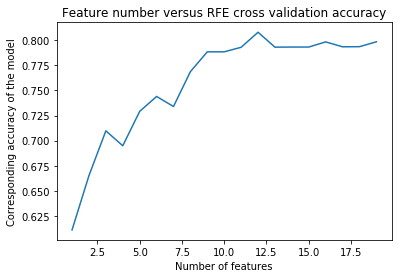

In [24]:
#4) Logistic Regression done using features on whivh Feature selection is performed using RFE
print("\n Feature selection with RFE\n")
train_LR_mean_acc_list=[]
from sklearn.feature_selection import RFE
for i in range(1,20):
    classifier=LogisticRegression(C=1.2,max_iter=600)  ## Technique for getting the best hyperparameters best_C and best_max_iter will be discussed later.
    rfe = RFE(classifier, i)
    rfe = rfe.fit(X_train, y_train)
    y_train_pred=rfe.predict(X_train)
    accuracies=cross_val_score(estimator=rfe, X=X_train,y=y_train,cv=5)     
    train_LR_mean_acc_list.append(accuracies.mean())

i_best=train_LR_mean_acc_list.index(max(train_LR_mean_acc_list))+1
classifier = LogisticRegression()
rfe = RFE(classifier, i_best)
rfe = rfe.fit(X_train, y_train)

#Scoring metrics evaluation (Keep copying this).
scoring = {'acc': 'accuracy',
           'Area_under_PR': 'average_precision',
           'Area_under_ROC_AUC': 'roc_auc'}
accuracies=cross_validate(rfe, X_train,y_train,scoring=scoring, cv=5) #Accuracy is obtained through splitting the training set into k-folds, applying the model om each one of them.   

#Cross validation accuracy performance
print("Mean training accuracy on the k-folds : "+str(accuracies['train_acc'].mean()))
print("Cross validation Accuracy: "+str(accuracies['test_acc'].mean())+" +- "+ str(accuracies['test_acc'].std()))
print("Area under PR curve: "+str(accuracies['test_Area_under_PR'].mean()))
print("Area under ROC-AUC curve: "+str(accuracies['test_Area_under_ROC_AUC'].mean()))

plt.figure(13)
plt.plot(np.arange(1,20).tolist(),train_LR_mean_acc_list)
plt.xlabel('Number of features')
plt.ylabel('Corresponding accuracy of the model')
plt.title('Feature number versus RFE cross validation accuracy')

#Test performance
print("\nTest set performance: "+ str(accuracy_score(y_test,rfe.predict(X_test))))

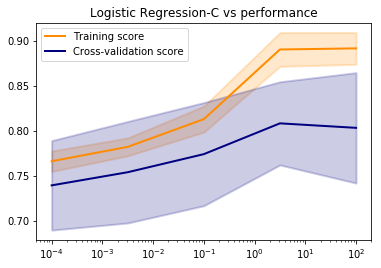

In [31]:
# With hyperparameter feature selection using cross validation

# All hyperparameters are tuned and the train versus cross validation performnace are plotted to get the right hyperparameter that is devoid of bias and variance (does not underfit or overfit).

# 1). C (1/regularization penalty term)
from sklearn.model_selection import validation_curve
param_range=np.logspace(-4,2,5)
train_scores, valid_scores = validation_curve(LogisticRegression(), X_train, y_train, "C", param_range, cv=5)

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
valid_scores_mean = np.mean(valid_scores, axis=1)
valid_scores_std = np.std(valid_scores, axis=1)

lw = 2
plt.figure(14)
plt.semilogx(param_range, train_scores_mean, label="Training score",
             color="darkorange", lw=lw)
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.semilogx(param_range, valid_scores_mean, label="Cross-validation score",
             color="navy", lw=lw)
plt.fill_between(param_range, valid_scores_mean - valid_scores_std,
                 valid_scores_mean + valid_scores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc="best")
plt.title('Logistic Regression-C vs performance')
plt.show()

best_C=3e0   ### Obtained from the curve.

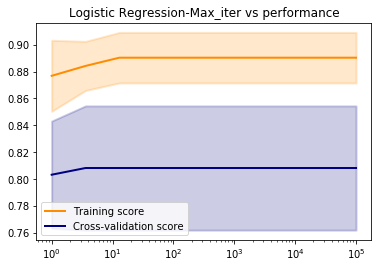

Mean training accuracy on the k-folds : 0.8744073316670453
Cross validation Accuracy: 0.8078048780487805 +- 0.07161704123240502
Area under PR curve: 0.8992092737322434
Area under ROC-AUC curve: 0.8969696969696971

Test set performance: 0.87


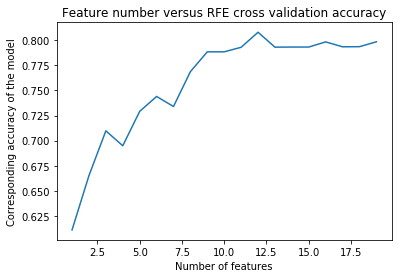

In [32]:
#  2). max_iter (maximum iterations until convergence)

from sklearn.model_selection import validation_curve
param_range=np.logspace(0,5,10)
train_scores, valid_scores = validation_curve(LogisticRegression(C=3), X_train, y_train, "max_iter", param_range, cv=5)

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
valid_scores_mean = np.mean(valid_scores, axis=1)
valid_scores_std = np.std(valid_scores, axis=1)

lw = 2
plt.figure(15)
plt.semilogx(param_range, train_scores_mean, label="Training score",
             color="darkorange", lw=lw)
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.semilogx(param_range, valid_scores_mean, label="Cross-validation score",
             color="navy", lw=lw)
plt.fill_between(param_range, valid_scores_mean - valid_scores_std,
                 valid_scores_mean + valid_scores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc="best")
plt.title('Logistic Regression-Max_iter vs performance')
plt.show()

best_max_iter=15e0  ## Obtained from the curve.

## Now building the Logistic Regression classifier with RFE feature selection technique, and best hyperparameters selected from above.
classifier = LogisticRegression(C=best_C,max_iter=best_max_iter)
rfe = RFE(classifier, i_best)
rfe = rfe.fit(X_train, y_train)

plt.figure(13)
plt.plot(np.arange(1,20).tolist(),train_LR_mean_acc_list)
plt.xlabel('Number of features')
plt.ylabel('Corresponding accuracy of the model')
plt.title('Feature number versus RFE cross validation accuracy')

scoring = {'acc': 'accuracy',
           'Area_under_PR': 'average_precision',
           'Area_under_ROC_AUC': 'roc_auc'}
accuracies=cross_validate(estimator=rfe, X=X_train,y=y_train,scoring=scoring,cv=5)

#Cross validation accuracy performance
print("Mean training accuracy on the k-folds : "+str(accuracies['train_acc'].mean()))
print("Cross validation Accuracy: "+str(accuracies['test_acc'].mean())+" +- "+ str(accuracies['test_acc'].std()))
print("Area under PR curve: "+str(accuracies['test_Area_under_PR'].mean()))
print("Area under ROC-AUC curve: "+str(accuracies['test_Area_under_ROC_AUC'].mean()))

#Test performance
print("\nTest set performance: "+ str(accuracy_score(y_test,rfe.predict(X_test))))


In [33]:
#--------------------------------------Algorithm 2- Linear Support vector machines------------------------#
scoring = {'acc': 'accuracy',
           'Area_under_PR': 'average_precision',
           'Area_under_ROC_AUC': 'roc_auc'}
#1) Part 1: Plain Linear SVM
from sklearn.svm import SVC
classifier = SVC(kernel='linear',probability=1)
accuracies=cross_validate(estimator=classifier, X=X_train,y=y_train,scoring=scoring,cv=5)
#Cross validation accuracy performance
print("Mean training accuracy on the k-folds : "+str(accuracies['train_acc'].mean()))
print("Cross validation Accuracy: "+str(accuracies['test_acc'].mean())+" +- "+ str(accuracies['test_acc'].std()))
print("Area under PR curve: "+str(accuracies['train_Area_under_PR'].mean()))
print("Area under ROC-AUC curve: "+str(accuracies['train_Area_under_ROC_AUC'].mean()))

classifier.fit(X_train,y_train)

#Test performance
print("Test set performance: "+ str(accuracy_score(y_test,classifier.predict(X_test))))
print("Test area under PR: "+str(average_precision_score(y_test,classifier.predict(X_test))))
print("Test area under ROC: "+str(roc_auc_score(y_test,classifier.predict(X_test))))

Mean training accuracy on the k-folds : 0.8842611527683102
Cross validation Accuracy: 0.8475609756097562 +- 0.05628151176300763
Area under PR curve: 0.9298236134241622
Area under ROC-AUC curve: 0.9391402523952221
Test set performance: 0.84
Test area under PR: 0.7981646423751687
Test area under ROC: 0.8253773969808241



Linear SVM after f_classif: 
Mean training accuracy on the k-folds : 0.88795728243581
Cross validation Accuracy: 0.8475609756097562 +- 0.05628151176300763
Area under PR curve: 0.8975305795798365
Area under ROC-AUC curve: 0.899134199134199
Test set performance: 0.84


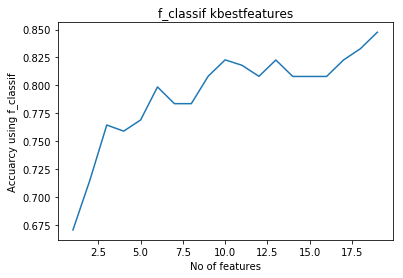

In [38]:
#2) Part 2: Feature selection using f_classification
print("\nLinear SVM after f_classif: ")
from sklearn.feature_selection import SelectKBest, f_classif
best_C=1.2
best_max_iter=600 ## Technique for obtaining best C and best_max_iter is described later.
classifier=SVC(kernel='linear',probability=1,C=best_C,max_iter=best_max_iter)
val_scores_mean=[]
for i in range(1,20):
    skb=SelectKBest(score_func=f_classif, k=i)
    fit=skb.fit(X_train,y_train)
    features=fit.transform(X_train)
    classifier.fit(features,y_train)
    accuracies=cross_val_score(estimator=classifier, X=features,y=y_train,cv=5)
    val_scores_mean.append(accuracies.mean())
    
plt.figure(21)
plt.plot(np.arange(1,20).tolist(),val_scores_mean)
plt.xlabel("No of features")
plt.ylabel("Accuarcy using f_classif")
plt.title("f_classif kbestfeatures")

k_best=val_scores_mean.index(max(val_scores_mean))+1
skb=SelectKBest(score_func=f_classif, k=k_best)
fit=skb.fit(X_train,y_train)
features=fit.transform(X_train)
classifier.fit(features,y_train)
accuracies=cross_validate(estimator=classifier, X=features,y=y_train,scoring=scoring,cv=5)

#Cross validation accuracy performance
print("Mean training accuracy on the k-folds : "+str(accuracies['train_acc'].mean()))
print("Cross validation Accuracy: "+str(accuracies['test_acc'].mean())+" +- "+ str(accuracies['test_acc'].std()))
print("Area under PR curve: "+str(accuracies['test_Area_under_PR'].mean()))
print("Area under ROC-AUC curve: "+str(accuracies['test_Area_under_ROC_AUC'].mean()))

#Test performance
features=fit.transform(X_test)
print("Test set performance: "+ str(accuracy_score(y_test,classifier.predict(features))))


Linear SVM after mutual_info_classif: 
Mean training accuracy on the k-folds : 0.7585094296750737
Cross validation Accuracy: 0.7396341463414634 +- 0.08667635205722977
Area under PR curve: 0.8559087239979813
Area under ROC-AUC curve: 0.8354294827979037
Test set performance: 0.51


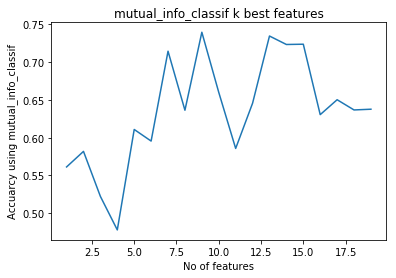

In [36]:
#3) Feature selection using mutual_information
print("\nLinear SVM after mutual_info_classif: ")
from sklearn.feature_selection import SelectKBest, mutual_info_classif
classifier=SVC(kernel='linear',probability=1,C=best_C,max_iter=best_max_iter)
val_scores_mean=[]
for i in range(1,20):
    skb=SelectKBest(score_func=mutual_info_classif, k=i)
    fit=skb.fit(X_train,y_train)
    features=fit.transform(X_train)
    classifier.fit(features,y_train)
    accuracies=cross_val_score(estimator=classifier, X=features,y=y_train,cv=5) #Accuracy is obtained through splitting the training set into k-folds, applying the model om each one of them.   
    val_scores_mean.append(accuracies.mean())
    
plt.figure(22)
plt.plot(np.arange(1,20).tolist(),val_scores_mean)
plt.xlabel("No of features")
plt.ylabel("Accuarcy using mutual_info_classif")
plt.title("mutual_info_classif k best features")

k_best=val_scores_mean.index(max(val_scores_mean))+1
skb=SelectKBest(score_func=f_classif, k=k_best)
fit=skb.fit(X_train,y_train)
features=fit.transform(X_train)
classifier.fit(features,y_train)
accuracies=cross_validate(estimator=classifier, X=features,y=y_train,scoring=scoring,cv=5)


#Cross validation accuracy performance
print("Mean training accuracy on the k-folds : "+str(accuracies['train_acc'].mean()))
print("Cross validation Accuracy: "+str(accuracies['test_acc'].mean())+" +- "+ str(accuracies['test_acc'].std()))
print("Area under PR curve: "+str(accuracies['test_Area_under_PR'].mean()))
print("Area under ROC-AUC curve: "+str(accuracies['test_Area_under_ROC_AUC'].mean()))

#Test performance
features=fit.transform(X_test)
print("Test set performance: "+ str(accuracy_score(y_test,classifier.predict(features))))



 Feature selection with RFE

Mean training accuracy on the k-folds : 0.8842611527683102
Cross validation Accuracy: 0.8475609756097562 +- 0.05628151176300763
Area under PR curve: 0.8963181745851992
Area under ROC-AUC curve: 0.8956937799043061

Test set performance: 0.84


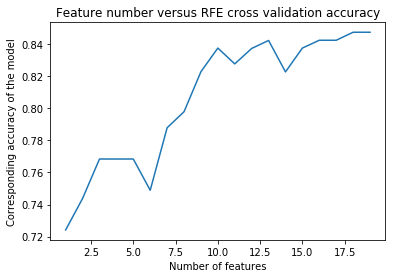

In [39]:
#4) Feature selection using RFE
print("\n Feature selection with RFE\n")
train_LR_mean_acc_list=[]
from sklearn.feature_selection import RFE
for i in range(1,20):
    classifier=SVC(kernel='linear',probability=1,C=best_C,max_iter=best_max_iter)
    rfe = RFE(classifier, i)
    rfe = rfe.fit(X_train, y_train)
    y_train_pred=rfe.predict(X_train)
    accuracies=cross_val_score(estimator=rfe, X=X_train,y=y_train,cv=5)     
    train_LR_mean_acc_list.append(accuracies.mean())

i_best=train_LR_mean_acc_list.index(max(train_LR_mean_acc_list))+1
classifier = SVC(kernel='linear',probability=1)
rfe = RFE(classifier, i_best)
rfe = rfe.fit(X_train, y_train)
accuracies=cross_validate(estimator=classifier, X=X_train,y=y_train,scoring=scoring,cv=5)


#Cross validation accuracy performance
print("Mean training accuracy on the k-folds : "+str(accuracies['train_acc'].mean()))
print("Cross validation Accuracy: "+str(accuracies['test_acc'].mean())+" +- "+ str(accuracies['test_acc'].std()))
print("Area under PR curve: "+str(accuracies['test_Area_under_PR'].mean()))
print("Area under ROC-AUC curve: "+str(accuracies['test_Area_under_ROC_AUC'].mean()))

plt.figure(23)
plt.plot(np.arange(1,20).tolist(),train_LR_mean_acc_list)
plt.xlabel('Number of features')
plt.ylabel('Corresponding accuracy of the model')
plt.title('Feature number versus RFE cross validation accuracy')


#Test performance
print("\nTest set performance: "+ str(accuracy_score(y_test,rfe.predict(X_test))))

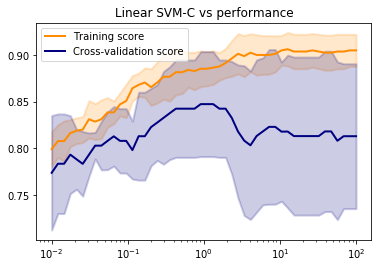

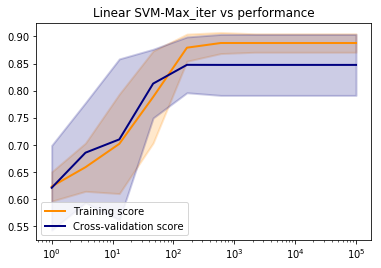

Mean training accuracy on the k-folds : 0.88795728243581
Cross validation Accuracy: 0.8475609756097562 +- 0.05628151176300763
Area under PR curve: 0.8975305795798365
Area under ROC-AUC curve: 0.899134199134199

Test set performance: 0.84

Test area under PR: 0.7981646423751687

Test area under ROC: 0.8253773969808241


In [40]:
#5) With hyperparameter selection using cross validation versus train accuracies.

#   1).C  (default=  1)
from sklearn.model_selection import validation_curve
param_range=np.logspace(-2,2)
train_scores, valid_scores = validation_curve(SVC(kernel='linear'), X_train, y_train, "C", param_range, cv=5)

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
valid_scores_mean = np.mean(valid_scores, axis=1)
valid_scores_std = np.std(valid_scores, axis=1)

lw = 2
plt.figure(24)
plt.semilogx(param_range, train_scores_mean, label="Training score",
             color="darkorange", lw=lw)
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.semilogx(param_range, valid_scores_mean, label="Cross-validation score",
             color="navy", lw=lw)
plt.fill_between(param_range, valid_scores_mean - valid_scores_std,
                 valid_scores_mean + valid_scores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc="best")
plt.title('Linear SVM-C vs performance')
plt.show()
best_C=1.2

#gamma is not affecting the performance when seen visually.

#  2). max_iter

from sklearn.model_selection import validation_curve
param_range=np.logspace(0,5,10)
train_scores, valid_scores = validation_curve(SVC(kernel='linear',C=best_C), X_train, y_train, "max_iter", param_range, cv=5)

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
valid_scores_mean = np.mean(valid_scores, axis=1)
valid_scores_std = np.std(valid_scores, axis=1)

lw = 2
plt.figure(25)
plt.semilogx(param_range, train_scores_mean, label="Training score",
             color="darkorange", lw=lw)
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.semilogx(param_range, valid_scores_mean, label="Cross-validation score",
             color="navy", lw=lw)
plt.fill_between(param_range, valid_scores_mean - valid_scores_std,
                 valid_scores_mean + valid_scores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc="best")
plt.title('Linear SVM-Max_iter vs performance')
plt.show()

best_max_iter=600

classifier = SVC(kernel='linear',C=best_C,max_iter=best_max_iter,probability=1)
rfe = RFE(classifier, i_best)
rfe = rfe.fit(X_train, y_train)
accuracies=cross_validate(estimator=classifier, X=X_train,y=y_train,scoring=scoring,cv=5)


#Cross validation accuracy performance
print("Mean training accuracy on the k-folds : "+str(accuracies['train_acc'].mean()))
print("Cross validation Accuracy: "+str(accuracies['test_acc'].mean())+" +- "+ str(accuracies['test_acc'].std()))
print("Area under PR curve: "+str(accuracies['test_Area_under_PR'].mean()))
print("Area under ROC-AUC curve: "+str(accuracies['test_Area_under_ROC_AUC'].mean()))
#Test performance
print("\nTest set performance: "+ str(accuracy_score(y_test,rfe.predict(X_test))))

from sklearn.metrics import average_precision_score
print("\nTest area under PR: "+str(average_precision_score(y_test,rfe.predict(X_test))))
from sklearn.metrics import roc_auc_score
print("\nTest area under ROC: "+str(roc_auc_score(y_test,rfe.predict(X_test))))
#---------------------------------------Linear SVM done--------------------------------------------------------#

In [41]:
#-------------------------Algorithm 3- Kernel SVM---------------------------------------------------------#
#1) Part 1: Plain (Default parameters) RBF kernel SVM
from sklearn.svm import SVC
classifier = SVC(kernel='rbf',probability=1)
classifier.fit(X_train,y_train)
accuracies=cross_validate(estimator=classifier, X=X_train,y=y_train,scoring=scoring,cv=5)


#Cross validation accuracy performance
print("Mean training accuracy on the k-folds : "+str(accuracies['train_acc'].mean()))
print("Cross validation Accuracy: "+str(accuracies['test_acc'].mean())+" +- "+ str(accuracies['test_acc'].std()))
print("Area under PR curve: "+str(accuracies['test_Area_under_PR'].mean()))
print("Area under ROC-AUC curve: "+str(accuracies['test_Area_under_ROC_AUC'].mean()))
#Test performance
print("Test set performance: "+ str(accuracy_score(y_test,classifier.predict(X_test))))

Mean training accuracy on the k-folds : 0.8707414981443611
Cross validation Accuracy: 0.808048780487805 +- 0.038375706176033024
Area under PR curve: 0.8913447779604555
Area under ROC-AUC curve: 0.8813852813852814
Test set performance: 0.81



RBF SVM after f_classif: 
Mean training accuracy on the k-folds : 0.8633189426645458
Cross validation Accuracy: 0.8278048780487806 +- 0.03366958107944671
Area under PR curve: 0.8938076977778747
Area under ROC-AUC curve: 0.8895192526771474
Test set performance: 0.82


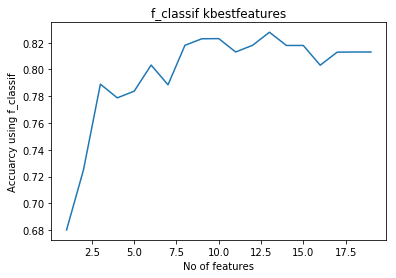

In [43]:
#2) Part 2: Feature selection using f_classification
print("\nRBF SVM after f_classif: ")
classifier = SVC(kernel='rbf',probability=1)
best_gamma=0.1 
best_max_iter=300 ## Techniques for obtaining best set of hyperparameters is discussed later
from sklearn.feature_selection import SelectKBest, f_classif
classifier=SVC(kernel='rbf',probability=1,gamma=best_gamma,max_iter=best_max_iter)
val_scores_mean=[]
for i in range(1,20):
    skb=SelectKBest(score_func=f_classif, k=i)
    fit=skb.fit(X_train,y_train)
    features=fit.transform(X_train)
    classifier.fit(features,y_train)
    accuracies=cross_val_score(estimator=classifier, X=features,y=y_train,cv=5)
    val_scores_mean.append(accuracies.mean())
    
plt.figure(31)
plt.plot(np.arange(1,20).tolist(),val_scores_mean)
plt.xlabel("No of features")
plt.ylabel("Accuarcy using f_classif")
plt.title("f_classif kbestfeatures")

k_best=val_scores_mean.index(max(val_scores_mean))+1
skb=SelectKBest(score_func=f_classif, k=k_best)
fit=skb.fit(X_train,y_train)
features=fit.transform(X_train)
classifier.fit(features,y_train)
accuracies=cross_validate(estimator=classifier, X=features,y=y_train,scoring=scoring,cv=5)

#Cross validation accuracy performance
print("Mean training accuracy on the k-folds : "+str(accuracies['train_acc'].mean()))
print("Cross validation Accuracy: "+str(accuracies['test_acc'].mean())+" +- "+ str(accuracies['test_acc'].std()))
print("Area under PR curve: "+str(accuracies['test_Area_under_PR'].mean()))
print("Area under ROC-AUC curve: "+str(accuracies['test_Area_under_ROC_AUC'].mean()))

#Test performance
features=fit.transform(X_test)
print("Test set performance: "+ str(accuracy_score(y_test,classifier.predict(features))))


RBF SVM after mutual_info_classif: 
Mean training accuracy on the k-folds : 0.8596228129970461
Cross validation Accuracy: 0.8130487804878049 +- 0.03862909550625242
Area under PR curve: 0.904929378989386
Area under ROC-AUC curve: 0.893529277739804
Test set performance: 0.76


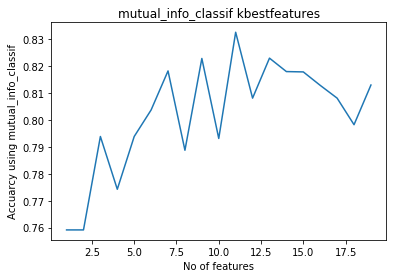

In [44]:
#3) Feature selection using mutual_information
print("\nRBF SVM after mutual_info_classif: ")
classifier = SVC(kernel='rbf',probability=1,gamma=best_gamma,max_iter=best_max_iter)
from sklearn.feature_selection import SelectKBest, mutual_info_classif
val_scores_mean=[]
for i in range(1,20):
    skb=SelectKBest(score_func=mutual_info_classif, k=i)
    f=skb.fit(X_train,y_train)
    features=f.transform(X_train)
    classifier.fit(features,y_train)
    accuracies=cross_val_score(estimator=classifier, X=features,y=y_train,cv=5) #Accuracy is obtained through splitting the training set into k-folds, applying the model om each one of them.   
    val_scores_mean.append(accuracies.mean())
    
plt.figure(32)
plt.plot(np.arange(1,20).tolist(),val_scores_mean)
plt.xlabel("No of features")
plt.ylabel("Accuarcy using mutual_info_classif")
plt.title("mutual_info_classif kbestfeatures")

k_best=val_scores_mean.index(max(val_scores_mean))+1
skb=SelectKBest(score_func=f_classif, k=k_best)
f=skb.fit(X_train,y_train)
features=f.transform(X_train)
classifier.fit(features,y_train)
accuracies=cross_validate(estimator=classifier, X=features,y=y_train,scoring=scoring,cv=5)

#Cross validation accuracy performance
print("Mean training accuracy on the k-folds : "+str(accuracies['train_acc'].mean()))
print("Cross validation Accuracy: "+str(accuracies['test_acc'].mean())+" +- "+ str(accuracies['test_acc'].std()))
print("Area under PR curve: "+str(accuracies['test_Area_under_PR'].mean()))
print("Area under ROC-AUC curve: "+str(accuracies['test_Area_under_ROC_AUC'].mean()))

#Test performance
features=f.transform(X_test)
print("Test set performance: "+ str(accuracy_score(y_test,classifier.predict(features))))

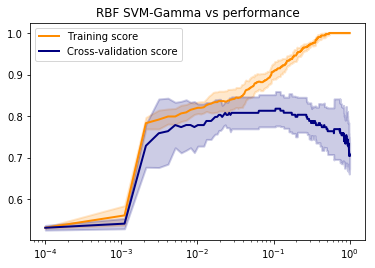

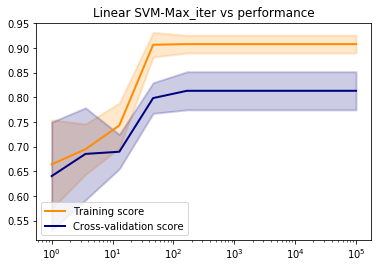

In [45]:
#4) With train verus Cross validation performance for best parameter selection.

#   1).gamma (default=  1/no of features)
from sklearn.model_selection import validation_curve
param_range=np.arange(0.0001,1.0,0.001)
train_scores, valid_scores = validation_curve(SVC(kernel='rbf'), X_train, y_train, "gamma", param_range, cv=5)

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
valid_scores_mean = np.mean(valid_scores, axis=1)
valid_scores_std = np.std(valid_scores, axis=1)

lw = 2
plt.figure(34)
plt.semilogx(param_range, train_scores_mean, label="Training score",
             color="darkorange", lw=lw)
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.semilogx(param_range, valid_scores_mean, label="Cross-validation score",
             color="navy", lw=lw)
plt.fill_between(param_range, valid_scores_mean - valid_scores_std,
                 valid_scores_mean + valid_scores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc="best")
plt.title('RBF SVM-Gamma vs performance')
plt.show()
best_gamma=0.1
#gamma is not affecting the performance when seen visually.

#  2). max_iter

from sklearn.model_selection import validation_curve
param_range=np.logspace(0,5,10)
train_scores, valid_scores = validation_curve(SVC(kernel='rbf',gamma=best_gamma), X_train, y_train, "max_iter", param_range, cv=5)

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
valid_scores_mean = np.mean(valid_scores, axis=1)
valid_scores_std = np.std(valid_scores, axis=1)

lw = 2
plt.figure(35)
plt.semilogx(param_range, train_scores_mean, label="Training score",
             color="darkorange", lw=lw)
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.semilogx(param_range, valid_scores_mean, label="Cross-validation score",
             color="navy", lw=lw)
plt.fill_between(param_range, valid_scores_mean - valid_scores_std,
                 valid_scores_mean + valid_scores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc="best")
plt.title('Linear SVM-Max_iter vs performance')
plt.show()

best_max_iter=300
#----------------------------------------Kernel SVM done--------------------------------------------------#

In [48]:
#------------------------------------Algorithm 4-Decision trees--------------------------------------------#

#1). Plain decision trees
print("\nPlain Decision trees\n")
from sklearn.tree import DecisionTreeClassifier
classifier=DecisionTreeClassifier()
classifier.fit(X_train,y_train)
y_train_pred=classifier.predict(X_train)
accuracies=cross_validate(estimator=classifier, X=X_train,y=y_train,scoring=scoring,cv=5)


#Cross validation accuracy performance
print("Mean training accuracy on the k-folds : "+str(accuracies['train_acc'].mean()))
print("Cross validation Accuracy: "+str(accuracies['test_acc'].mean())+" +- "+ str(accuracies['test_acc'].std()))
print("Area under PR curve: "+str(accuracies['test_Area_under_PR'].mean()))
print("Area under ROC-AUC curve: "+str(accuracies['test_Area_under_ROC_AUC'].mean()))

#Test performance
print("Test set performance: "+ str(accuracy_score(y_test,classifier.predict(X_test))))


Plain Decision trees

Mean training accuracy on the k-folds : 1.0
Cross validation Accuracy: 0.7 +- 0.06080952992096557
Area under PR curve: 0.6674949059431782
Area under ROC-AUC curve: 0.6978127136021872
Test set performance: 0.75


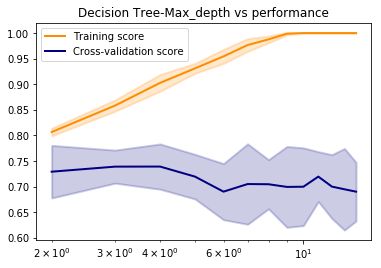


Accuracy in gini case is 0.7390243902439024

Accuracy in entropy case is 0.7147560975609756

Hyperparameter selected Decision trees

Mean training accuracy on the k-folds : 0.8583655229871997
Cross validation Accuracy: 0.7390243902439024 +- 0.03231362153679654
Area under PR curve: 0.7432678298553717
Area under ROC-AUC curve: 0.7583618136249715
Test set performance: 0.77


In [49]:
#2) Hyperparameter selection

#Tree depth
from sklearn.model_selection import validation_curve
param_range=np.arange(2,15)
train_scores, valid_scores = validation_curve(DecisionTreeClassifier(), X_train, y_train, "max_depth", param_range, cv=5)

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
valid_scores_mean = np.mean(valid_scores, axis=1)
valid_scores_std = np.std(valid_scores, axis=1)

lw = 2
plt.figure(45)
plt.semilogx(param_range, train_scores_mean, label="Training score",
             color="darkorange", lw=lw)
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.semilogx(param_range, valid_scores_mean, label="Cross-validation score",
             color="navy", lw=lw)
plt.fill_between(param_range, valid_scores_mean - valid_scores_std,
                 valid_scores_mean + valid_scores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc="best")
plt.title('Decision Tree-Max_depth vs performance')
plt.show()

best_max_depth=3

#best criterion for split- "gini" or "entropy"
split_criterions=["gini","entropy"]
for i in split_criterions:
    classifier=DecisionTreeClassifier(max_depth=best_max_depth,criterion=i)
    classifier.fit(X_train,y_train)
    y_train_pred=classifier.predict(X_train)
    accuracies=cross_val_score(estimator=classifier, X=X_train,y=y_train,cv=5)
    print("\nAccuracy in "+ i +" case is "+str(accuracies.mean()))

best_split_criterion="gini"

print("\nHyperparameter selected Decision trees\n")
from sklearn.tree import DecisionTreeClassifier
classifier=DecisionTreeClassifier(max_depth=best_max_depth,criterion=best_split_criterion)
classifier.fit(X_train,y_train)
y_train_pred=classifier.predict(X_train)
accuracies=cross_validate(estimator=classifier, X=X_train,y=y_train,scoring=scoring,cv=5)


#Cross validation accuracy performance
print("Mean training accuracy on the k-folds : "+str(accuracies['train_acc'].mean()))
print("Cross validation Accuracy: "+str(accuracies['test_acc'].mean())+" +- "+ str(accuracies['test_acc'].std()))
print("Area under PR curve: "+str(accuracies['test_Area_under_PR'].mean()))
print("Area under ROC-AUC curve: "+str(accuracies['test_Area_under_ROC_AUC'].mean()))

#Test performance
print("Test set performance: "+ str(accuracy_score(y_test,classifier.predict(X_test))))

Mean training accuracy on the k-folds : 0.8805423009921987
Cross validation Accuracy: 0.7740243902439025 +- 0.07486017106034301
Area under PR curve: 0.839840418088138
Area under ROC-AUC curve: 0.838915470494418
Test set performance: 0.76


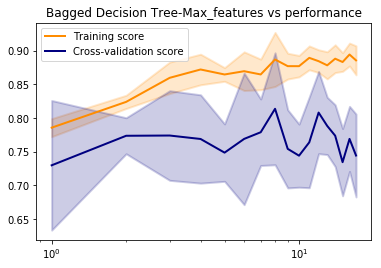

Mean training accuracy on the k-folds : 0.8583655229871997
Cross validation Accuracy: 0.7440243902439024 +- 0.03168479500303413
Area under PR curve: 0.7454734634964097
Area under ROC-AUC curve: 0.7643768512189565
Test set performance: 0.83


In [50]:
#Bagged decision tree
from sklearn.ensemble import BaggingClassifier
bc=BaggingClassifier(DecisionTreeClassifier(max_depth=best_max_depth,criterion=best_split_criterion))

accuracies=cross_validate(estimator=bc, X=X_train,y=y_train,scoring=scoring,cv=5)
bc.fit(X_train,y_train)

#Cross validation accuracy performance
print("Mean training accuracy on the k-folds : "+str(accuracies['train_acc'].mean()))
print("Cross validation Accuracy: "+str(accuracies['test_acc'].mean())+" +- "+ str(accuracies['test_acc'].std()))
print("Area under PR curve: "+str(accuracies['test_Area_under_PR'].mean()))
print("Area under ROC-AUC curve: "+str(accuracies['test_Area_under_ROC_AUC'].mean()))
#Test performance
print("Test set performance: "+ str(accuracy_score(y_test,bc.predict(X_test))))

#Hyperparameter selection of bagging parameters

from sklearn.model_selection import validation_curve
param_range=np.arange(1,X_train.shape[1]-1)
train_scores, valid_scores = validation_curve(BaggingClassifier(DecisionTreeClassifier(max_depth=best_max_depth,criterion=best_split_criterion)), X_train, y_train, "max_features", param_range, cv=5)

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
valid_scores_mean = np.mean(valid_scores, axis=1)
valid_scores_std = np.std(valid_scores, axis=1)

lw = 2
plt.figure(46)
plt.semilogx(param_range, train_scores_mean, label="Training score",
             color="darkorange", lw=lw)
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.semilogx(param_range, valid_scores_mean, label="Cross-validation score",
             color="navy", lw=lw)
plt.fill_between(param_range, valid_scores_mean - valid_scores_std,
                 valid_scores_mean + valid_scores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc="best")
plt.title('Bagged Decision Tree-Max_features vs performance')
plt.show()

best_max_features=7

bc=BaggingClassifier(DecisionTreeClassifier(max_depth=best_max_depth,criterion=best_split_criterion),max_samples=0.8,max_features=best_max_features)
bc.fit(X_train,y_train)
accuracies=cross_validate(estimator=classifier, X=X_train,y=y_train,scoring=scoring,cv=5)


#Cross validation accuracy performance
print("Mean training accuracy on the k-folds : "+str(accuracies['train_acc'].mean()))
print("Cross validation Accuracy: "+str(accuracies['test_acc'].mean())+" +- "+ str(accuracies['test_acc'].std()))
print("Area under PR curve: "+str(accuracies['test_Area_under_PR'].mean()))
print("Area under ROC-AUC curve: "+str(accuracies['test_Area_under_ROC_AUC'].mean()))

#Test performance
print("Test set performance: "+ str(accuracy_score(y_test,bc.predict(X_test))))

#-------------------------------------Decision trees done----------------------------------------------#


Plain random forest classifier

Mean training accuracy on the k-folds : 0.9827539195637355
Cross validation Accuracy: 0.7636585365853659 +- 0.041850062384592567
Area under PR curve: 0.849534696231034
Area under ROC-AUC curve: 0.8336637047163362
Test set performance: 0.75


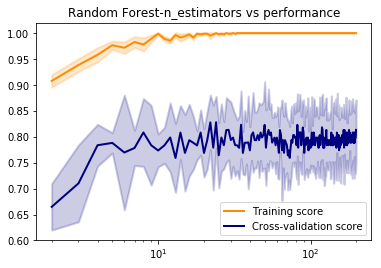

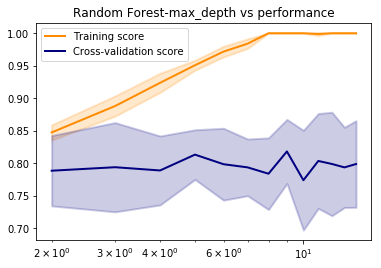


 Accuracy in gini case is: 0.7884146341463415 +- 0.05167336667297238

 Accuracy in entropy case is: 0.7982926829268294 +- 0.02180643307599655
Mean training accuracy on the k-folds : 0.8892069984094524
Cross validation Accuracy: 0.7981707317073171 +- 0.016694404837704957
Area under PR curve: 0.8960433080743166
Area under ROC-AUC curve: 0.8787195260879471
Test set performance: 0.82


In [51]:
#----------------------------------Algorithm 6- Random forest-----------------------------------------#

#Plain random forest
print("\nPlain random forest classifier\n")
from sklearn.ensemble import RandomForestClassifier
classifier=RandomForestClassifier()
classifier.fit(X_train,y_train)
accuracies=cross_validate(estimator=classifier, X=X_train,y=y_train,scoring=scoring,cv=5)


#Cross validation accuracy performance
print("Mean training accuracy on the k-folds : "+str(accuracies['train_acc'].mean()))
print("Cross validation Accuracy: "+str(accuracies['test_acc'].mean())+" +- "+ str(accuracies['test_acc'].std()))
print("Area under PR curve: "+str(accuracies['test_Area_under_PR'].mean()))
print("Area under ROC-AUC curve: "+str(accuracies['test_Area_under_ROC_AUC'].mean()))
#Test performance
print("Test set performance: "+ str(accuracy_score(y_test,classifier.predict(X_test))))

#Hyperparameter selected random forest

#n_estimators
from sklearn.model_selection import validation_curve
param_range=np.arange(2,200)
train_scores, valid_scores = validation_curve(RandomForestClassifier(), X_train, y_train, "n_estimators", param_range, cv=5)

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
valid_scores_mean = np.mean(valid_scores, axis=1)
valid_scores_std = np.std(valid_scores, axis=1)

lw = 2
plt.figure(66)
plt.semilogx(param_range, train_scores_mean, label="Training score",
             color="darkorange", lw=lw)
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.semilogx(param_range, valid_scores_mean, label="Cross-validation score",
             color="navy", lw=lw)
plt.fill_between(param_range, valid_scores_mean - valid_scores_std,
                 valid_scores_mean + valid_scores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc="best")
plt.title('Random Forest-n_estimators vs performance')
plt.show()

best_n_estimators=55

#max_depth
from sklearn.model_selection import validation_curve
param_range=np.arange(2,15)
train_scores, valid_scores = validation_curve(RandomForestClassifier(n_estimators=best_n_estimators), X_train, y_train, "max_depth", param_range, cv=5)

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
valid_scores_mean = np.mean(valid_scores, axis=1)
valid_scores_std = np.std(valid_scores, axis=1)

lw = 2
plt.figure(67)
plt.semilogx(param_range, train_scores_mean, label="Training score",
             color="darkorange", lw=lw)
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.semilogx(param_range, valid_scores_mean, label="Cross-validation score",
             color="navy", lw=lw)
plt.fill_between(param_range, valid_scores_mean - valid_scores_std,
                 valid_scores_mean + valid_scores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc="best")
plt.title('Random Forest-max_depth vs performance')
plt.show()

best_max_depth=3 #Although not very clear from the graphs, chosen from the decision tree model.

#criterion
split_criterion=["gini","entropy"]
for i in split_criterion:
    classifier=RandomForestClassifier(n_estimators=best_n_estimators,max_depth=best_max_depth, criterion=i)
    classifier.fit(X_train,y_train)
    accuracies=cross_val_score(estimator=classifier, X=X_train,y=y_train,cv=5)
    print("\n Accuracy in "+ i+ " case is: "+str(accuracies.mean())+ " +- " + str(accuracies.std()))

best_split_criterion="gini"

#Hyperparameterized random forest
classifier=RandomForestClassifier(n_estimators=best_n_estimators, max_depth=best_max_depth, criterion=best_split_criterion)
classifier.fit(X_train,y_train)
accuracies=cross_validate(estimator=classifier, X=X_train,y=y_train,scoring=scoring,cv=5)


#Cross validation accuracy performance
print("Mean training accuracy on the k-folds : "+str(accuracies['train_acc'].mean()))
print("Cross validation Accuracy: "+str(accuracies['test_acc'].mean())+" +- "+ str(accuracies['test_acc'].std()))
print("Area under PR curve: "+str(accuracies['test_Area_under_PR'].mean()))
print("Area under ROC-AUC curve: "+str(accuracies['test_Area_under_ROC_AUC'].mean()))
#Test performance
print("Test set performance: "+ str(accuracy_score(y_test,classifier.predict(X_test))))
#------------------------------------Random forest done-------------------------------------------------#


Plain Extra Trees classifier

Mean training accuracy on the k-folds : 1.0
Cross validation Accuracy: 0.8325609756097562 +- 0.0712445662580442
Area under PR curve: 0.8603630150953286
Area under ROC-AUC curve: 0.8778081567555253
Test set performance: 0.82


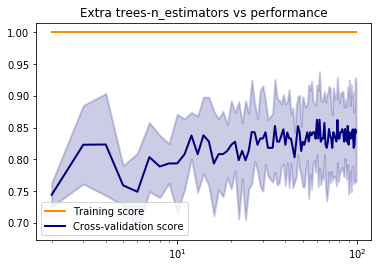

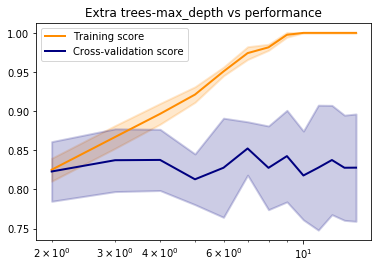


 Accuracy in gini case is: 0.8226829268292685 +- 0.047164387799504846

 Accuracy in entropy case is: 0.8376829268292683 +- 0.049558430892995865
Mean training accuracy on the k-folds : 0.9310308263273498
Cross validation Accuracy: 0.8276829268292684 +- 0.034027668344576156
Area under PR curve: 0.8971507437940514
Area under ROC-AUC curve: 0.8894736842105264
Test set performance: 0.83


In [52]:
#--------------------------------------Algorithm 7: Extra Trees Classifier-------------------------------------------------------#
from sklearn.ensemble import ExtraTreesClassifier

#Plain random forest
print("\nPlain Extra Trees classifier\n")
classifier=ExtraTreesClassifier()
classifier.fit(X_train,y_train)
accuracies=cross_validate(estimator=classifier, X=X_train,y=y_train,scoring=scoring,cv=5)


#Cross validation accuracy performance
print("Mean training accuracy on the k-folds : "+str(accuracies['train_acc'].mean()))
print("Cross validation Accuracy: "+str(accuracies['test_acc'].mean())+" +- "+ str(accuracies['test_acc'].std()))
print("Area under PR curve: "+str(accuracies['test_Area_under_PR'].mean()))
print("Area under ROC-AUC curve: "+str(accuracies['test_Area_under_ROC_AUC'].mean()))
#Test performance
print("Test set performance: "+ str(accuracy_score(y_test,classifier.predict(X_test))))

#Hyperparameter selected extra trees

#n_estimators
from sklearn.model_selection import validation_curve
param_range=np.arange(2,100)
train_scores, valid_scores = validation_curve(ExtraTreesClassifier(), X_train, y_train, "n_estimators", param_range, cv=5)

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
valid_scores_mean = np.mean(valid_scores, axis=1)
valid_scores_std = np.std(valid_scores, axis=1)

lw = 2
plt.figure(76)
plt.semilogx(param_range, train_scores_mean, label="Training score",
             color="darkorange", lw=lw)
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.semilogx(param_range, valid_scores_mean, label="Cross-validation score",
             color="navy", lw=lw)
plt.fill_between(param_range, valid_scores_mean - valid_scores_std,
                 valid_scores_mean + valid_scores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc="best")
plt.title('Extra trees-n_estimators vs performance')
plt.show()

best_n_estimators=55

#max_depth
from sklearn.model_selection import validation_curve
param_range=np.arange(2,15)
train_scores, valid_scores = validation_curve(ExtraTreesClassifier(n_estimators=best_n_estimators), X_train, y_train, "max_depth", param_range, cv=5)

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
valid_scores_mean = np.mean(valid_scores, axis=1)
valid_scores_std = np.std(valid_scores, axis=1)

lw = 2
plt.figure(77)
plt.semilogx(param_range, train_scores_mean, label="Training score",
             color="darkorange", lw=lw)
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.semilogx(param_range, valid_scores_mean, label="Cross-validation score",
             color="navy", lw=lw)
plt.fill_between(param_range, valid_scores_mean - valid_scores_std,
                 valid_scores_mean + valid_scores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc="best")
plt.title('Extra trees-max_depth vs performance')
plt.show()

best_max_depth=5

#criterion
split_criterion=["gini","entropy"]
for i in split_criterion:
    classifier=ExtraTreesClassifier(n_estimators=best_n_estimators,max_depth=best_max_depth, criterion=i)
    classifier.fit(X_train,y_train)
    accuracies=cross_val_score(estimator=classifier, X=X_train,y=y_train,cv=5)
    print("\n Accuracy in "+ i+ " case is: "+str(accuracies.mean())+ " +- " + str(accuracies.std()))

best_split_criterion="gini"

#Hyperparameterized random forest
classifier=ExtraTreesClassifier(n_estimators=best_n_estimators, max_depth=best_max_depth, criterion=best_split_criterion)
classifier.fit(X_train,y_train)
accuracies=cross_validate(estimator=classifier, X=X_train,y=y_train,scoring=scoring,cv=5)


#Cross validation accuracy performance
print("Mean training accuracy on the k-folds : "+str(accuracies['train_acc'].mean()))
print("Cross validation Accuracy: "+str(accuracies['test_acc'].mean())+" +- "+ str(accuracies['test_acc'].std()))
print("Area under PR curve: "+str(accuracies['test_Area_under_PR'].mean()))
print("Area under ROC-AUC curve: "+str(accuracies['test_Area_under_ROC_AUC'].mean()))
#Test performance
print("Test set performance: "+ str(accuracy_score(y_test,classifier.predict(X_test))))


Plain K neighbors classifier

Mean training accuracy on the k-folds : 0.8301067939104749
Cross validation Accuracy: 0.7639024390243903 +- 0.06801271008346223
Area under PR curve: 0.8339592707935279
Area under ROC-AUC curve: 0.8481658692185008
Test set performance: 0.76


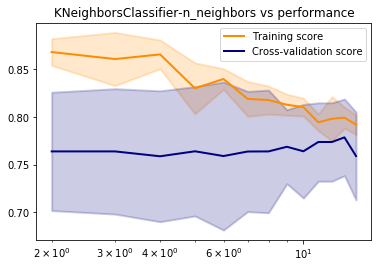


 Accuracy for uniform case is: 0.7637804878048782

 Accuracy for distance case is: 0.7637804878048782

 Accuracy for 1 (value of p) case is: 0.7982926829268294

 Accuracy for 2 (value of p) case is: 0.7637804878048782

 Accuracy for 3 (value of p) case is: 0.763658536585366

Hyperparametrized K neighbors classifier

Mean training accuracy on the k-folds : 0.8818223131106567
Cross validation Accuracy: 0.7982926829268294 +- 0.04095527950937045
Area under PR curve: 0.8263974116973788
Area under ROC-AUC curve: 0.8450444292549555
Test set performance: 0.8


In [54]:
from sklearn.neighbors import KNeighborsClassifier

#Plain K nearest neighbors
print("\nPlain K neighbors classifier\n")
classifier=KNeighborsClassifier()
classifier.fit(X_train,y_train)
accuracies=cross_validate(estimator=classifier, X=X_train,y=y_train,scoring=scoring,cv=5)


#Cross validation accuracy performance
print("Mean training accuracy on the k-folds : "+str(accuracies['train_acc'].mean()))
print("Cross validation Accuracy: "+str(accuracies['test_acc'].mean())+" +- "+ str(accuracies['test_acc'].std()))
print("Area under PR curve: "+str(accuracies['test_Area_under_PR'].mean()))
print("Area under ROC-AUC curve: "+str(accuracies['test_Area_under_ROC_AUC'].mean()))
#Test performance
print("Test set performance: "+ str(accuracy_score(y_test,classifier.predict(X_test))))

#Hyperparameter selected KNN

#1) n_neighbors
from sklearn.model_selection import validation_curve
param_range=np.arange(2,15)
train_scores, valid_scores = validation_curve(KNeighborsClassifier(), X_train, y_train, "n_neighbors", param_range, cv=5)

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
valid_scores_mean = np.mean(valid_scores, axis=1)
valid_scores_std = np.std(valid_scores, axis=1)

lw = 2
plt.figure(87)
plt.semilogx(param_range, train_scores_mean, label="Training score",
             color="darkorange", lw=lw)
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.semilogx(param_range, valid_scores_mean, label="Cross-validation score",
             color="navy", lw=lw)
plt.fill_between(param_range, valid_scores_mean - valid_scores_std,
                 valid_scores_mean + valid_scores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc="best")
plt.title('KNeighborsClassifier-n_neighbors vs performance')
plt.show()

best_n_neighbors=3

#2) weights
weight=["uniform","distance"]
for i in weight:
    classifier=KNeighborsClassifier(n_neighbors=best_n_neighbors,weights=i)
    classifier.fit(X_train,y_train)
    accuracies=cross_val_score(estimator=classifier, X=X_train,y=y_train,cv=5)
    print("\n Accuracy for "+ i + " case is: "+ str(accuracies.mean()))
    
#Not making a difference, leave at default.
    
#3). p
ps=[1,2,3]
for i in ps:
    classifier=KNeighborsClassifier(n_neighbors=best_n_neighbors,p=i)
    classifier.fit(X_train,y_train)
    accuracies=cross_val_score(estimator=classifier, X=X_train,y=y_train,cv=5)
    print("\n Accuracy for "+ str(i) + " (value of p) case is: "+ str(accuracies.mean()))
best_p=1 #Manhattan distance works better over Euclidian distance.

#hyperparametrized KNN
print("\nHyperparametrized K neighbors classifier\n")
classifier=KNeighborsClassifier(p=best_p,n_neighbors=best_n_neighbors)
classifier.fit(X_train,y_train)
accuracies=cross_validate(estimator=classifier, X=X_train,y=y_train,scoring=scoring,cv=5)


#Cross validation accuracy performance
print("Mean training accuracy on the k-folds : "+str(accuracies['train_acc'].mean()))
print("Cross validation Accuracy: "+str(accuracies['test_acc'].mean())+" +- "+ str(accuracies['test_acc'].std()))
print("Area under PR curve: "+str(accuracies['test_Area_under_PR'].mean()))
print("Area under ROC-AUC curve: "+str(accuracies['test_Area_under_ROC_AUC'].mean()))

#Test performance
print("Test set performance: "+ str(accuracy_score(y_test,classifier.predict(X_test))))


Mean training accuracy on the k-folds : 0.8990683935469213
Cross validation Accuracy: 0.7785365853658537 +- 0.05259251501246267
Area under PR curve: 0.8706104630546267
Area under ROC-AUC curve: 0.8704488493962179
Test set performance: 0.82


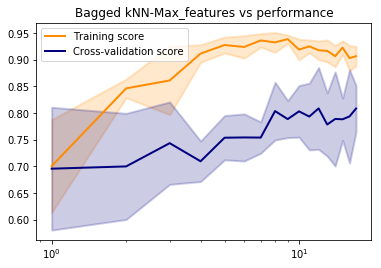

Mean training accuracy on the k-folds : 0.9100810421873817
Cross validation Accuracy: 0.7737804878048781 +- 0.055180737053978766
Area under PR curve: 0.880098002632262
Area under ROC-AUC curve: 0.873148781043518
Test set performance: 0.82


In [74]:
#Bagged KNN performance
from sklearn.ensemble import BaggingClassifier
bc=BaggingClassifier(KNeighborsClassifier(p=best_p,n_neighbors=best_n_neighbors))
bc.fit(X_train,y_train)
accuracies=cross_validate(estimator=bc, X=X_train,y=y_train,scoring=scoring,cv=5)


#Cross validation accuracy performance
print("Mean training accuracy on the k-folds : "+str(accuracies['train_acc'].mean()))
print("Cross validation Accuracy: "+str(accuracies['test_acc'].mean())+" +- "+ str(accuracies['test_acc'].std()))
print("Area under PR curve: "+str(accuracies['test_Area_under_PR'].mean()))
print("Area under ROC-AUC curve: "+str(accuracies['test_Area_under_ROC_AUC'].mean()))

#Test performance
print("Test set performance: "+ str(accuracy_score(y_test,bc.predict(X_test))))

#Hyperparameter selection for the bagging parameters

from sklearn.model_selection import validation_curve
param_range=np.arange(1,X_train.shape[1]-1)
train_scores, valid_scores = validation_curve(BaggingClassifier(KNeighborsClassifier(n_neighbors=best_n_neighbors,p=best_p)), X_train, y_train, param_name="max_features", param_range=param_range, cv=5)

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
valid_scores_mean = np.mean(valid_scores, axis=1)
valid_scores_std = np.std(valid_scores, axis=1)

lw = 2
plt.figure(86)
plt.semilogx(param_range, train_scores_mean, label="Training score",
             color="darkorange", lw=lw)
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.semilogx(param_range, valid_scores_mean, label="Cross-validation score",
             color="navy", lw=lw)
plt.fill_between(param_range, valid_scores_mean - valid_scores_std,
                 valid_scores_mean + valid_scores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc="best")
plt.title('Bagged kNN-Max_features vs performance')
plt.show()

best_max_features=7

bc=BaggingClassifier(KNeighborsClassifier(p=best_p,n_neighbors=best_n_neighbors),max_features=best_max_features,max_samples=0.8)
bc.fit(X_train,y_train)
accuracies=cross_validate(estimator=bc, X=X_train,y=y_train,scoring=scoring,cv=5)


#Cross validation accuracy performance
print("Mean training accuracy on the k-folds : "+str(accuracies['train_acc'].mean()))
print("Cross validation Accuracy: "+str(accuracies['test_acc'].mean())+" +- "+ str(accuracies['test_acc'].std()))
print("Area under PR curve: "+str(accuracies['test_Area_under_PR'].mean()))
print("Area under ROC-AUC curve: "+str(accuracies['test_Area_under_ROC_AUC'].mean()))

#Test performance
print("Test set performance: "+ str(accuracy_score(y_test,bc.predict(X_test))))
#---------------------------------KNN done--------------------------------------------------------------#

In [75]:
#------------------------------Algorithm 9:MLP----------------------------------------#

#1) Plain MLP
print("\nPlain MLP classifier\n")
from sklearn.neural_network import MLPClassifier
classifier=MLPClassifier()
accuracies=cross_validate(estimator=classifier, X=X_train,y=y_train,scoring=scoring,cv=5)

#Cross validation accuracy performance
print("Mean training accuracy on the k-folds : "+str(accuracies['train_acc'].mean()))
print("Cross validation Accuracy: "+str(accuracies['test_acc'].mean())+" +- "+ str(accuracies['test_acc'].std()))
print("Area under PR curve: "+str(accuracies['test_Area_under_PR'].mean()))
print("Area under ROC-AUC curve: "+str(accuracies['test_Area_under_ROC_AUC'].mean()))
classifier.fit(X_train,y_train)
#Test performance
print("Test set performance: "+ str(accuracy_score(y_test,classifier.predict(X_test))))

#2) Manual adjustment

classifier=MLPClassifier()
classifier.fit(X_train,y_train)
accuracies=cross_val_score(estimator=classifier, X=X_train,y=y_train,cv=5)
print("\nPlain MLP CV accuracy"+str(accuracies.mean())+ " +- "+str(accuracies.std()))
print("\n Training set performance:"+ str( accuracy_score(y_train,classifier.predict(X_train))))
probs = classifier.predict_proba(X_train)
preds = probs[:,1]
from sklearn.metrics import average_precision_score
print("\nArea under the PR curve is:\n")
print(average_precision_score(y_train, preds))
from sklearn.metrics import roc_auc_score
print("\nArea under the ROC_AUC_curve is:\n")
print(roc_auc_score(y_train, preds))

#Test performance
print("Test set performance: "+ str(accuracy_score(y_test,classifier.predict(X_test))))



Plain MLP classifier

Mean training accuracy on the k-folds : 0.9446110732409301
Cross validation Accuracy: 0.8132926829268292 +- 0.049139532300798566
Area under PR curve: 0.8946143203921043
Area under ROC-AUC curve: 0.885645933014354
Test set performance: 0.82

Plain MLP CV accuracy0.8282926829268293 +- 0.06435697588476885

 Training set performance:0.8571428571428571

Area under the PR curve is:

0.9346078766312261

Area under the ROC_AUC_curve is:

0.930019493177388
Test set performance: 0.86


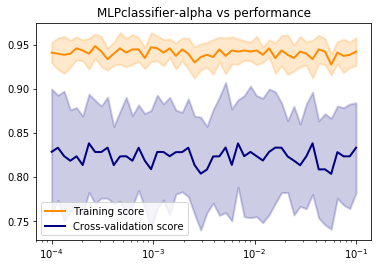

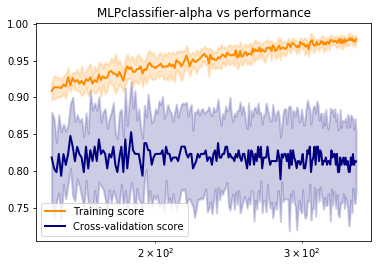

In [76]:
#Hyperparameter selection

#1) alpha
from sklearn.model_selection import validation_curve
param_range=np.logspace(-4,-1)
train_scores, valid_scores = validation_curve(MLPClassifier(), X_train, y_train, "alpha", param_range, cv=5)

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
valid_scores_mean = np.mean(valid_scores, axis=1)
valid_scores_std = np.std(valid_scores, axis=1)

lw = 2
plt.figure(96)
plt.semilogx(param_range, train_scores_mean, label="Training score",
             color="darkorange", lw=lw)
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.semilogx(param_range, valid_scores_mean, label="Cross-validation score",
             color="navy", lw=lw)
plt.fill_between(param_range, valid_scores_mean - valid_scores_std,
                 valid_scores_mean + valid_scores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc="best")
plt.title('MLPclassifier-alpha vs performance')
plt.show()

# Leave at default

#1) max_iter
from sklearn.model_selection import validation_curve
param_range=np.arange(150,350)
train_scores, valid_scores = validation_curve(MLPClassifier(), X_train, y_train, "max_iter", param_range, cv=5)

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
valid_scores_mean = np.mean(valid_scores, axis=1)
valid_scores_std = np.std(valid_scores, axis=1)

lw = 2
plt.figure(97)
plt.semilogx(param_range, train_scores_mean, label="Training score",
             color="darkorange", lw=lw)
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.semilogx(param_range, valid_scores_mean, label="Cross-validation score",
             color="navy", lw=lw)
plt.fill_between(param_range, valid_scores_mean - valid_scores_std,
                 valid_scores_mean + valid_scores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc="best")
plt.title('MLPclassifier-alpha vs performance')
plt.show()

#Default value of 200 is perfect
#Not going to change to other optimization techniques. Leaving it at 'Adam' with default parameters itself.

In [78]:
#------------------------------Boosting techniques---------------------------------------------------------#
#-----------------------------Algorithm 10: GBT---------------------------------------------------------------#
#1) Plain GBT
from sklearn.ensemble import GradientBoostingClassifier
classifier=GradientBoostingClassifier()
accuracies=cross_validate(estimator=classifier, X=X_train,y=y_train,scoring=scoring,cv=5)

#Cross validation accuracy performance
print("Mean training accuracy on the k-folds : "+str(accuracies['train_acc'].mean()))
print("Cross validation Accuracy: "+str(accuracies['test_acc'].mean())+" +- "+ str(accuracies['test_acc'].std()))
print("Area under PR curve: "+str(accuracies['test_Area_under_PR'].mean()))
print("Area under ROC-AUC curve: "+str(accuracies['test_Area_under_ROC_AUC'].mean()))
#Test performance
classifier.fit(X_train,y_train)
print("Test set performance: "+ str(accuracy_score(y_test,classifier.predict(X_test))))

## Use GBT with early stopping if using 3.2.4.3.5 version ##
# #2) GBT with early stopping

# from sklearn.ensemble import GradientBoostingClassifier
# classifier=GradientBoostingClassifier(n_iter_no_change=5, validation_fraction=0.2)

# accuracies=cross_validate(estimator=classifier, X=X_train,y=y_train,scoring=scoring,cv=5)


# #Cross validation accuracy performance
# print("Mean training accuracy on the k-folds : "+str(accuracies['train_acc'].mean()))
# print("Cross validation Accuracy: "+str(accuracies['test_acc'].mean())+" +- "+ str(accuracies['test_acc'].std()))
# print("Area under PR curve: "+str(accuracies['test_Area_under_PR'].mean()))
# print("Area under ROC-AUC curve: "+str(accuracies['test_Area_under_ROC_AUC'].mean()))


# classifier.fit(X_train,y_train)
# #Test performance
# print("Test set performance: "+ str(accuracy_score(y_test,classifier.predict(X_test))))


Mean training accuracy on the k-folds : 1.0
Cross validation Accuracy: 0.7591463414634146 +- 0.058883625738662466
Area under PR curve: 0.8542234714000324
Area under ROC-AUC curve: 0.8392116655274551
Test set performance: 0.78


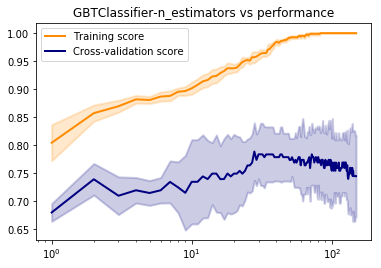

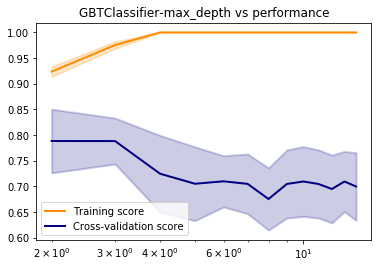


 The accuracy of the friedman_msecase is 0.7834146341463415 +- 0.049156175255349974

 The accuracy of the msecase is 0.7834146341463415 +- 0.049156175255349974

 The accuracy of the maecase is 0.7291463414634147 +- 0.055170494489580814

 The accuracy of the deviance case is 0.7882926829268293 +- 0.044800104635723814

 The accuracy of the exponential case is 0.7834146341463415 +- 0.05151973568238551
Mean training accuracy on the k-folds : 0.9753843823373474
Cross validation Accuracy: 0.7834146341463415 +- 0.049156175255349974
Area under PR curve: 0.8498892486290204
Area under ROC-AUC curve: 0.8465481886534517
Test set performance: 0.8


In [79]:
#Hyperparameter search for GBT

#1) n_estimators

from sklearn.model_selection import validation_curve
param_range=np.arange(1,150)
train_scores, valid_scores = validation_curve(GradientBoostingClassifier(), X_train, y_train, "n_estimators", param_range, cv=5)

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
valid_scores_mean = np.mean(valid_scores, axis=1)
valid_scores_std = np.std(valid_scores, axis=1)

lw = 2
plt.figure(107)
plt.semilogx(param_range, train_scores_mean, label="Training score",
             color="darkorange", lw=lw)
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.semilogx(param_range, valid_scores_mean, label="Cross-validation score",
             color="navy", lw=lw)
plt.fill_between(param_range, valid_scores_mean - valid_scores_std,
                 valid_scores_mean + valid_scores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc="best")
plt.title('GBTClassifier-n_estimators vs performance')
plt.show()

best_n_estimators=37

#1) max_depth

from sklearn.model_selection import validation_curve
param_range=np.arange(2,15)
train_scores, valid_scores = validation_curve(GradientBoostingClassifier(n_estimators=best_n_estimators), X_train, y_train, "max_depth", param_range, cv=5)

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
valid_scores_mean = np.mean(valid_scores, axis=1)
valid_scores_std = np.std(valid_scores, axis=1)

lw = 2
plt.figure(107)
plt.semilogx(param_range, train_scores_mean, label="Training score",
             color="darkorange", lw=lw)
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.semilogx(param_range, valid_scores_mean, label="Cross-validation score",
             color="navy", lw=lw)
plt.fill_between(param_range, valid_scores_mean - valid_scores_std,
                 valid_scores_mean + valid_scores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc="best")
plt.title('GBTClassifier-max_depth vs performance')
plt.show()

best_max_depth=3

#Selecting criterion
criterions=["friedman_mse","mse","mae"]
for i in criterions:
    classifier=GradientBoostingClassifier(n_estimators=best_n_estimators,max_depth=best_max_depth,criterion=i)
    accuracies=cross_val_score(estimator=classifier, X=X_train,y=y_train,cv=5)
    print("\n The accuracy of the "+ i+"case is "+ str(accuracies.mean())+ " +- "+ str(accuracies.std()))
    
#Leave at default becase friendman mse is performing well.
    
#2) Selecting loss
losses=["deviance","exponential"]
for i in losses:
    classifier=GradientBoostingClassifier(n_estimators=best_n_estimators,max_depth=best_max_depth,loss=i)
    accuracies=cross_val_score(estimator=classifier, X=X_train,y=y_train,cv=5)
    print("\n The accuracy of the "+ i+" case is "+ str(accuracies.mean())+ " +- "+ str(accuracies.std()))

#Leave at default because it doesn't change much.
    
classifier=GradientBoostingClassifier(n_estimators=best_n_estimators,max_depth=best_max_depth)

accuracies=cross_validate(estimator=classifier, X=X_train,y=y_train,scoring=scoring,cv=5)


#Cross validation accuracy performance
print("Mean training accuracy on the k-folds : "+str(accuracies['train_acc'].mean()))
print("Cross validation Accuracy: "+str(accuracies['test_acc'].mean())+" +- "+ str(accuracies['test_acc'].std()))
print("Area under PR curve: "+str(accuracies['test_Area_under_PR'].mean()))
print("Area under ROC-AUC curve: "+str(accuracies['test_Area_under_ROC_AUC'].mean()))

classifier.fit(X_train,y_train)
#Test performance
print("Test set performance: "+ str(accuracy_score(y_test,classifier.predict(X_test))))
#------------------------GBT done----------------------------------#


In [80]:
#---------------------Algorithm 11: Adaboost classifier----------------------------#

#1) Plain Adaboost classifier with default base class
from sklearn.ensemble import AdaBoostClassifier
classifier=AdaBoostClassifier()

accuracies=cross_validate(estimator=classifier, X=X_train,y=y_train,scoring=scoring,cv=5)


#Cross validation accuracy performance
print("Mean training accuracy on the k-folds : "+str(accuracies['train_acc'].mean()))
print("Cross validation Accuracy: "+str(accuracies['test_acc'].mean())+" +- "+ str(accuracies['test_acc'].std()))
print("Area under PR curve: "+str(accuracies['test_Area_under_PR'].mean()))
print("Area under ROC-AUC curve: "+str(accuracies['test_Area_under_ROC_AUC'].mean()))

#Test performance
classifier.fit(X_train,y_train)
print("Test set performance: "+ str(accuracy_score(y_test,classifier.predict(X_test))))

#Using Adaboost on all the estimators with their selected hyperparameters from above and then doing hyperparameter search over n_estimators and learning rate.
#We need not boost linear algorithm because combination of several linear algorithm is a linear algorithm itself.

Mean training accuracy on the k-folds : 0.9507536166022874
Cross validation Accuracy: 0.7586585365853659 +- 0.04730764301302643
Area under PR curve: 0.815302631555547
Area under ROC-AUC curve: 0.8051948051948052
Test set performance: 0.8


Mean training accuracy on the k-folds : 0.9324850412784974
Cross validation Accuracy: 0.7485365853658538 +- 0.09774494849036292
Area under PR curve: 0.8382141216799687
Area under ROC-AUC curve: 0.8229665071770335
Test set performance: 0.65
0.7637804878048782 +- 0.04992796714897166

 Training set performance:0.7733990147783252

Area under the PR curve is:

0.8967399590120533

Area under the ROC_AUC_curve is:

0.8862573099415205
Test set performance: 0.73
0.7490243902439024 +- 0.05420124660788625

 Training set performance:0.7733990147783252

Area under the PR curve is:

0.8967399590120533

Area under the ROC_AUC_curve is:

0.8862573099415205
Test set performance: 0.74
0.7540243902439026 +- 0.05047307432096717

 Training set performance:0.7733990147783252

Area under the PR curve is:

0.8967399590120533

Area under the ROC_AUC_curve is:

0.8862573099415205
Test set performance: 0.73
0.7589024390243904 +- 0.04924413800545259

 Training set performance:0.7733990147783252

Area under the PR

0.7343902439024391 +- 0.04834654547380241

 Training set performance:0.7832512315270936

Area under the PR curve is:

0.8975520380725834

Area under the ROC_AUC_curve is:

0.8741715399610136
Test set performance: 0.82
0.719390243902439 +- 0.04493434962613365

 Training set performance:0.7339901477832512

Area under the PR curve is:

0.8143167452323461

Area under the ROC_AUC_curve is:

0.8275828460038985
Test set performance: 0.76
0.7340243902439024 +- 0.039630206183134946

 Training set performance:0.7487684729064039

Area under the PR curve is:

0.831973869132625

Area under the ROC_AUC_curve is:

0.8450292397660819
Test set performance: 0.78
0.7490243902439024 +- 0.07185876656292722

 Training set performance:0.7536945812807881

Area under the PR curve is:

0.8203295013028808

Area under the ROC_AUC_curve is:

0.8323586744639377
Test set performance: 0.8
0.7489024390243904 +- 0.0571408812439892

 Training set performance:0.7487684729064039

Area under the PR curve is:

0.84048903987

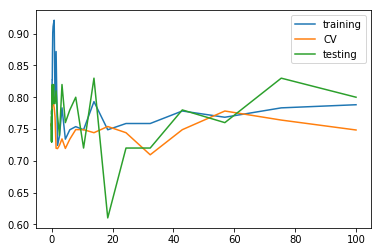

In [81]:
#1) Boosting SVM

classifier=AdaBoostClassifier(base_estimator=SVC(kernel='rbf',gamma=0.1,max_iter=300,probability=1))
accuracies=cross_validate(estimator=classifier, X=X_train,y=y_train,scoring=scoring,cv=5)


#Cross validation accuracy performance
print("Mean training accuracy on the k-folds : "+str(accuracies['train_acc'].mean()))
print("Cross validation Accuracy: "+str(accuracies['test_acc'].mean())+" +- "+ str(accuracies['test_acc'].std()))
print("Area under PR curve: "+str(accuracies['test_Area_under_PR'].mean()))
print("Area under ROC-AUC curve: "+str(accuracies['test_Area_under_ROC_AUC'].mean()))

classifier.fit(X_train,y_train)
#Test performance
print("Test set performance: "+ str(accuracy_score(y_test,classifier.predict(X_test))))

ran=np.logspace(-4,2)
cl1=[]
cl2=[]
cl3=[]
for i in ran:
    classifier=AdaBoostClassifier(base_estimator=SVC(kernel='rbf',gamma=0.1,max_iter=300,probability=1), n_estimators=5, learning_rate=i, algorithm='SAMME.R', random_state=None)
    accuracies=cross_val_score(estimator=classifier, X=X_train,y=y_train,cv=5)
    classifier.fit(X_train,y_train)
    print(str(accuracies.mean())+ " +- "+str(accuracies.std()))
    print("\n Training set performance:"+ str( accuracy_score(y_train,classifier.predict(X_train))))
    probs = classifier.predict_proba(X_train)
    preds = probs[:,1]
    from sklearn.metrics import average_precision_score
    print("\nArea under the PR curve is:\n")
    print(average_precision_score(y_train, preds))
    from sklearn.metrics import roc_auc_score
    print("\nArea under the ROC_AUC_curve is:\n")
    print(roc_auc_score(y_train, preds))
    #Test performance
    print("Test set performance: "+ str(accuracy_score(y_test,classifier.predict(X_test))))
    cl1.append(accuracy_score(y_train,classifier.predict(X_train)))
    cl2.append(accuracies.mean())
    cl3.append(accuracy_score(y_test,classifier.predict(X_test)))
    
plt.figure(111)
plt.plot(ran.tolist(),cl1,label='training')
plt.plot(ran.tolist(),cl2,label='CV')
plt.plot(ran.tolist(),cl3,label='testing')
plt.legend()

In [82]:
#2) Decision tree

classifier=AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3, criterion="gini"))
accuracies=cross_validate(estimator=classifier, X=X_train,y=y_train,scoring=scoring,cv=5)

#Cross validation accuracy performance
print("Mean training accuracy on the k-folds : "+str(accuracies['train_acc'].mean()))
print("Cross validation Accuracy: "+str(accuracies['test_acc'].mean())+" +- "+ str(accuracies['test_acc'].std()))
print("Area under PR curve: "+str(accuracies['test_Area_under_PR'].mean()))
print("Area under ROC-AUC curve: "+str(accuracies['test_Area_under_ROC_AUC'].mean()))

classifier.fit(X_train,y_train)
#Test performance
print("Test set performance: "+ str(accuracy_score(y_test,classifier.predict(X_test))))
#only Classifiers that support sample_weights can be used inside AdaBoost. Thus, the others are not supported by adaboost or will not work.
#-------------------------------------AdaBoost done--------------------------------------------#

Mean training accuracy on the k-folds : 1.0
Cross validation Accuracy: 0.7690243902439025 +- 0.0635661885064486
Area under PR curve: 0.8525423638986032
Area under ROC-AUC curve: 0.8288448393711552
Test set performance: 0.79


In [83]:
#--------------------Voting ensamble (Combination of two of the best performing classifiers)----------------------------#
from sklearn.ensemble import VotingClassifier
estimators = []
model1 = LogisticRegression(C=3,max_iter=15)
estimators.append(('logistic', model1))
model2 = SVC(gamma=0.1,max_iter=100,probability=1)
estimators.append(('svm', model2))
# create the ensemble model
ensemble = VotingClassifier(estimators)

classifier=VotingClassifier(estimators,voting='soft')
accuracies=cross_validate(estimator=classifier, X=X_train,y=y_train,scoring=scoring,cv=5)

#Cross validation accuracy performance
print("Mean training accuracy on the k-folds : "+str(accuracies['train_acc'].mean()))
print("Cross validation Accuracy: "+str(accuracies['test_acc'].mean())+" +- "+ str(accuracies['test_acc'].std()))
print("Area under PR curve: "+str(accuracies['test_Area_under_PR'].mean()))
print("Area under ROC-AUC curve: "+str(accuracies['test_Area_under_ROC_AUC'].mean()))

classifier.fit(X_train,y_train)
#Test performance
print("Test set performance: "+ str(accuracy_score(y_test,classifier.predict(X_test))))

Mean training accuracy on the k-folds : 0.9064379307733091
Cross validation Accuracy: 0.8228048780487803 +- 0.03517949216020056
Area under PR curve: 0.899917375645854
Area under ROC-AUC curve: 0.8955798587377535
Test set performance: 0.83
